In [1]:
import numpy as np
import pandas as pd
import os
import json

In [2]:
os.chdir('D:\Data Science\Data Visualization Coursera\Assignment')
data = pd.read_csv('D:\Data Science\Data Visualization Coursera\Assignment\Topic_Survey_Assignment.csv', index_col = 0)
data

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136
Machine Learning,1629,477,74


# Question 1:

Use the artist layer of Matplotlib to replicate the bar chart below to visualize the percentage of the respondents' interest in the different data science topics surveyed.

In [3]:
import matplotlib.pyplot as plt

In [4]:
d_sort = data.sort_values(['Very interested'], ascending = False)
d_sort

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,1688,444,60
Machine Learning,1629,477,74
Data Visualization,1340,734,102
Big Data (Spark / Hadoop),1332,729,127
Deep Learning,1263,770,136
Data Journalism,429,1081,610


In [5]:
#Calculating percentages
Total = 2233
d_sort['Very interested'] = ((d_sort.iloc[:6, 0]/Total) * 100).round(2)
d_sort['Somewhat interested'] = ((d_sort.iloc[:6, 1]/Total) * 100).round(2)
d_sort['Not interested'] = ((d_sort.iloc[:6, 2]/Total) * 100).round(2)
d_sort

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,75.59,19.88,2.69
Machine Learning,72.95,21.36,3.31
Data Visualization,60.01,32.87,4.57
Big Data (Spark / Hadoop),59.65,32.65,5.69
Deep Learning,56.56,34.48,6.09
Data Journalism,19.21,48.41,27.32


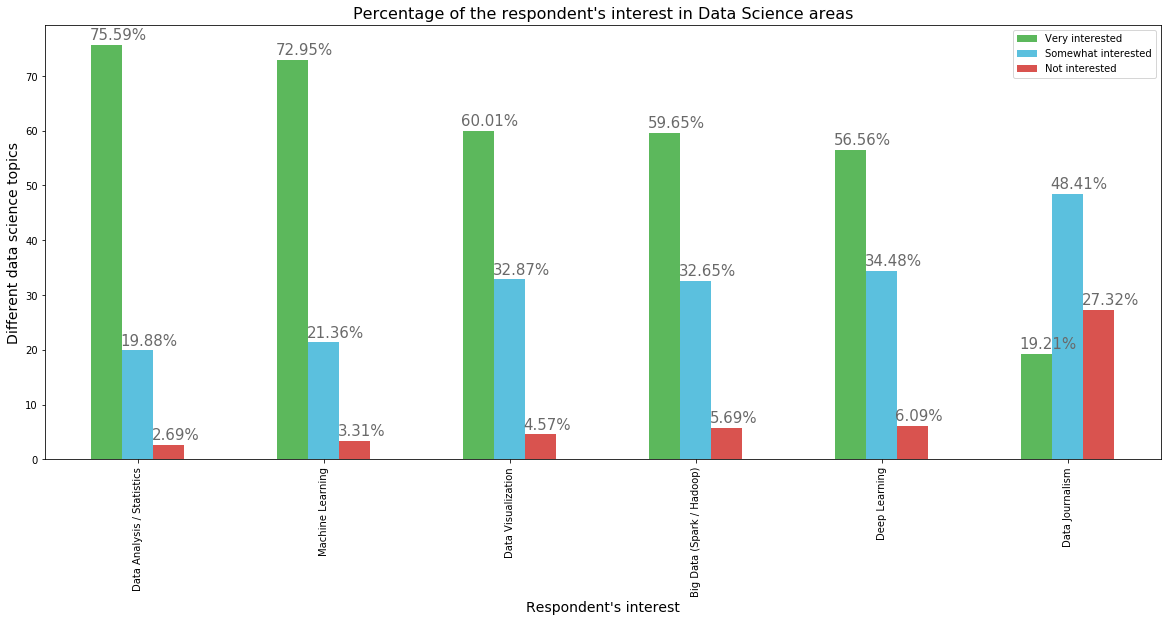

In [6]:
# Plotting graph

ax = d_sort.plot(kind = 'bar', figsize = (20,8), color = ['#5cb85c','#5bc0de','#d9534f'])

ax.set_xlabel('Respondent\'s interest', fontsize = 14) 
ax.set_ylabel('Different data science topics', fontsize = 14) 
ax.set_title('Percentage of the respondent\'s interest in Data Science areas', fontsize = 16) 

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()-.01, i.get_height()+ 1, str(round((i.get_height()), 2))+'%', fontsize=15, color='dimgrey')

plt.show()

# Question 2: Choropleth Map of crime rates in San Francisco

In [7]:
data = pd.read_csv('D:\Data Science\Data Visualization Coursera\Assignment\Police_Department_Incidents_-_Previous_Year__2016_.csv')
data.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11.00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",1.200580e+13
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11.00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",1.200580e+13
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14.59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",1.410590e+13
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01-05-2016 0.00,23.50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",1.600140e+13
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01-01-2016 0.00,0.30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",1.600030e+13


In [8]:
data.rename(columns = {'PdDistrict': 'Neighborhood','Descript':'Types of Crime'}, inplace = True)

In [9]:
data.isna().sum()

IncidntNum        0
Category          0
Types of Crime    0
DayOfWeek         0
Date              0
Time              0
Neighborhood      1
Resolution        0
Address           0
X                 0
Y                 0
Location          0
PdId              0
dtype: int64

In [10]:
data.dropna(axis = 0, inplace = True)

In [11]:
data.shape

(150499, 13)

In [12]:
data.isna().sum()

IncidntNum        0
Category          0
Types of Crime    0
DayOfWeek         0
Date              0
Time              0
Neighborhood      0
Resolution        0
Address           0
X                 0
Y                 0
Location          0
PdId              0
dtype: int64

In [13]:
df_crime = data[['Neighborhood','Types of Crime']]

In [14]:
df_crime.head()

,Neighborhood,Types of Crime
0,SOUTHERN,POSS OF PROHIBITED WEAPON
1,SOUTHERN,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE"
2,BAYVIEW,WARRANT ARREST
3,TENDERLOIN,LOST PROPERTY
4,MISSION,LOST PROPERTY


In [15]:
df_crime.groupby(['Neighborhood']).count().reset_index()

,Neighborhood,Types of Crime
0,BAYVIEW,14303
1,CENTRAL,17666
2,INGLESIDE,11594
3,MISSION,19503
4,NORTHERN,20100
5,PARK,8699
6,RICHMOND,8922
7,SOUTHERN,28445
8,TARAVAL,11325
9,TENDERLOIN,9942


<b>After using groupby on the types of crime, we get it's count

# Choropleth Map

Let's visualize where these crimes took place in the city of <b>San Francisco</b> using a Choropleth map. We will use the default style and we will initialize the <b>zoom level</b> to <b>12.

In [16]:
with open('san-francisco.geojson') as f:
    map_data = json.load(f)

In [17]:
map_data

{'crs': {'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'},
  'type': 'name'},
 'features': [{'geometry': {'coordinates': [[[-122.40532134644249,
       37.806867516866724],
      [-122.40440122046421, 37.80885380837723],
      [-122.40438743872008, 37.80886519707406],
      [-122.40436730880846, 37.808872966044206],
      [-122.40434376667437, 37.808869624109605],
      [-122.40431429421082, 37.80881799170733],
      [-122.40394067997407, 37.80876198999871],
      [-122.40392016838871, 37.808754877186864],
      [-122.40390555965932, 37.808734021463344],
      [-122.40390814512642, 37.80871288836611],
      [-122.40471878715235, 37.80696905969842],
      [-122.4039597318324, 37.80657809724],
      [-122.4027673862454, 37.80801170771318],
      [-122.40274578869823, 37.80802322234157],
      [-122.40271771623641, 37.80802615647638],
      [-122.40269398350013, 37.80801537335998],
      [-122.40235483855216, 37.8078397060222],
      [-122.40234023023558, 37.80781885013204],
      

In [18]:
world_san = r'map_data'

In [19]:
import folium
# create a plain world map
world_map = folium.Map(location=[0, 0], zoom_start=3, tiles='Mapbox Bright')

<b>Now create a Choropleth map using Choropleth function

In [20]:
from folium.features import Choropleth

In [26]:
Choropleth(geo_data = 'san-francisco.geojson',
    data = data,
    name = 'Crime rate in San Francisco',
    columns = ['Neighborhood','Types of Crime'],
    key_on = 'Feature.properties.DISTRICT',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crime rates in San Francisco',
    ).add_to(world_map)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [22]:
world_map